Take the results of synthetic_classes.py. Plot the histograms of error values of the training and test classes to evaluate the interclass separation and hence the performance of the algorithm.

In [71]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math
from collections import Counter
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import segment_cluster as sc
import importlib
importlib.reload(sc)
np.random.seed(0)

In [72]:
results_file="valid_results_20190603_4.csv"
k_clusters=[150]
seg_lens=[10,50,100,150,200]

#"normal"/training lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier"/test lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

no. clusters:  150 segment length:  10
Mean rho error: 	 218.38023824474973 Max rho error:  420.81003242006886


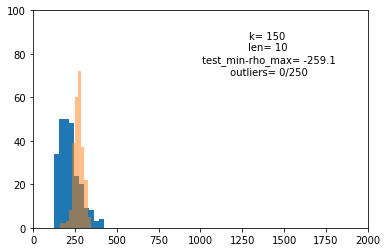

Mean test error: 	 272.44990061667875
Min test-max rho error:  -259.12654292363914
no. misclassified observations:  250

no. clusters:  150 segment length:  50
Mean rho error: 	 400.5992823393679 Max rho error:  728.0495466049723


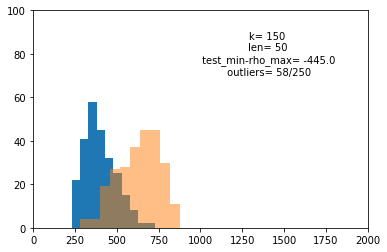

Mean test error: 	 630.9034387168249
Min test-max rho error:  -445.0355901477819
no. misclassified observations:  192

no. clusters:  150 segment length:  100
Mean rho error: 	 577.9316841848998 Max rho error:  966.0503569160312


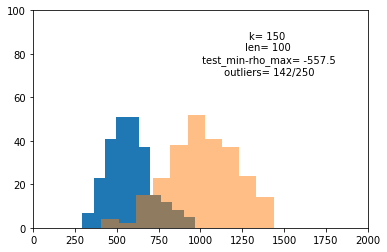

Mean test error: 	 1006.0398861160946
Min test-max rho error:  -557.4543011003218
no. misclassified observations:  108

no. clusters:  150 segment length:  150
Mean rho error: 	 691.1070979939925 Max rho error:  1174.4889941035783


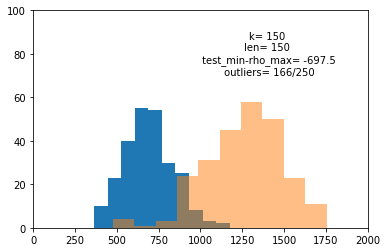

Mean test error: 	 1257.7952199891793
Min test-max rho error:  -697.4683721399097
no. misclassified observations:  84

no. clusters:  150 segment length:  200
Mean rho error: 	 760.7932144139186 Max rho error:  1285.362918996267


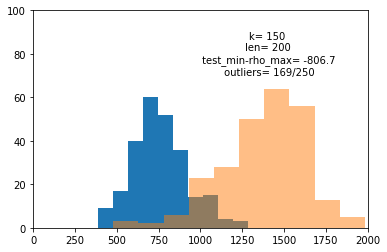

Mean test error: 	 1374.249259357175
Min test-max rho error:  -806.7366140962758
no. misclassified observations:  81



In [75]:
#enter the appropriate file name and hyperparameters used
results=np.loadtxt(results_file, dtype=float, delimiter=",")

for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print("no. clusters: ", k_cluster, "segment length: ", seg_len)
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        max_rho=np.max(train[:,-1])
        print("Mean rho error: \t", np.mean(train[:,-1]), "Max rho error: ", max_rho)
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        min_test=np.min(test[:,-1])
        counter=0
        for t in test[:,-1]:
            if t<max_rho:
                counter+=1
        f = plt.figure()
        ax = f.add_subplot(111)
        plt.hist(train[:,-1])
        plt.hist(test[:,-1],alpha=0.5)
        plt.xlim([0,2000])
        plt.ylim([0,100])
        plt.text(0.7,0.8,"k= {}\nlen= {}\n test_min-rho_max= {}\n outliers= {}/250".format(k_cluster, seg_len, round(min_test-max_rho,1), 250-counter),
                 ha='center', va='center', transform=ax.transAxes)
        plt.show()
        
        print("Mean test error: \t", np.mean(test[:,-1]))
        print("Min test-max rho error: ", min_test-max_rho)
        print("no. misclassified observations: ", counter)
        
        print()

Take the results of synthetic_classes.py. Extract the indices of X best/worst reconstructions of training and test classes to understand how to improve the algorithm; how to error of reconstruction of the different classes more different. 

In [76]:
results=np.loadtxt(results_file, dtype=float, delimiter=",")
#structure of the lines in the file: cluster number index, segment length index, training=0 test=1, lightcurve index, error)

extract_x=5

output=[]
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        output.append(("no. clusters: ", k_cluster, "segment length: ", seg_len))
        output.append("worst/best training, wort/best test")
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        sorted_train=train[train[:,-1].argsort()]
        worst_train=sorted_train[-extract_x:,3].astype(int)
        best_train=sorted_train[0:extract_x,3].astype(int)        
        
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        sorted_test=test[test[:,-1].argsort()]
        worst_test=sorted_test[-extract_x:,3].astype(int)
        best_test=sorted_test[0:extract_x,3].astype(int)
        output.append(np.vstack((worst_train,best_train,worst_test,best_test)))

In [77]:
output

[('no. clusters: ', 150, 'segment length: ', 10),
 'worst/best training, wort/best test',
 array([[168,  99,  71,  32, 101],
        [ 69, 177, 149, 186, 123],
        [ 13, 242,  90,  29, 220],
        [122, 183, 190,  73, 247]]),
 ('no. clusters: ', 150, 'segment length: ', 50),
 'worst/best training, wort/best test',
 array([[165, 121,  65, 168, 101],
        [186,  69,  24,   3,  37],
        [179,  29,  74,  81, 226],
        [122,  73, 190, 183, 247]]),
 ('no. clusters: ', 150, 'segment length: ', 100),
 'worst/best training, wort/best test',
 array([[ 50, 165, 101,  60, 225],
        [212, 158, 177,  82, 186],
        [ 16,  68,  69, 102, 206],
        [183, 190, 122,  73, 146]]),
 ('no. clusters: ', 150, 'segment length: ', 150),
 'worst/best training, wort/best test',
 array([[194, 173, 237, 165, 101],
        [112, 149, 177, 186, 212],
        [171,  90, 220, 119,  69],
        [ 73, 122, 183, 190, 247]]),
 ('no. clusters: ', 150, 'segment length: ', 200),
 'worst/best traini

take the ids of the best and worst reconstructions, repeat and plot 

('no. clusters: ', 150, 'segment length: ', 10)
Worst reconstructions of ordinary lightcurves


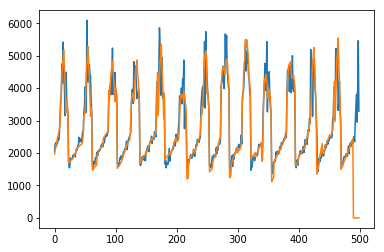

383.1104749478882


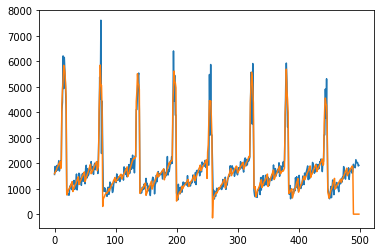

393.19964202310905


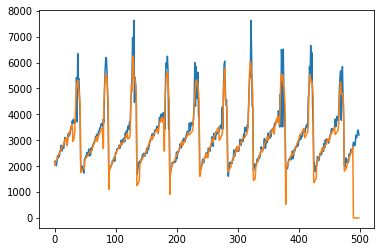

394.6826630737324


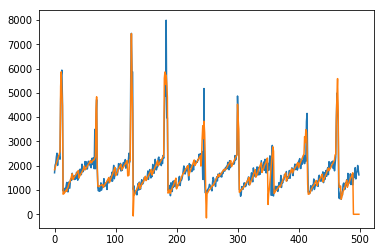

397.5976420522312


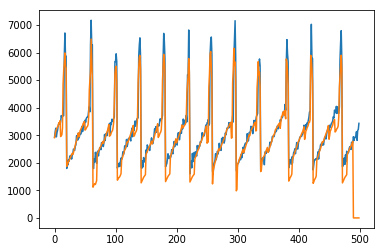

420.81003242006886
Best reconstructions of ordinary lightcurves


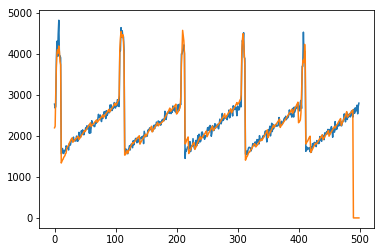

126.45818500853481


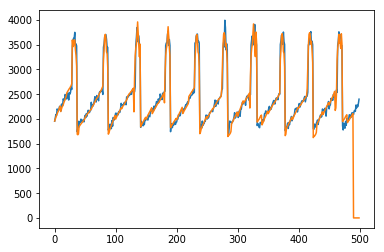

126.53014918838339


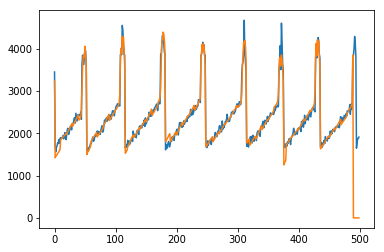

128.48773738667518


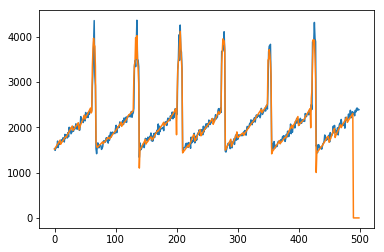

128.57943521505155


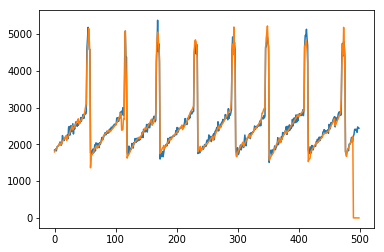

132.38684280716697
Worst reconstructions of outlier lightcurves


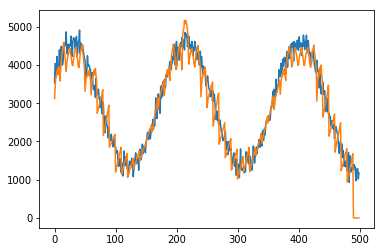

329.025132270375


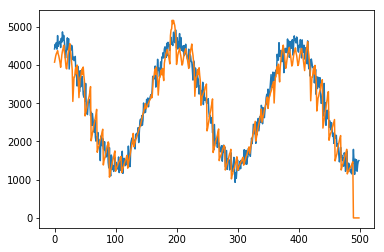

330.59138340902484


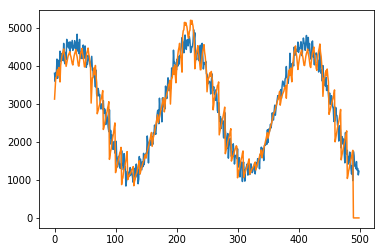

336.1473832031438


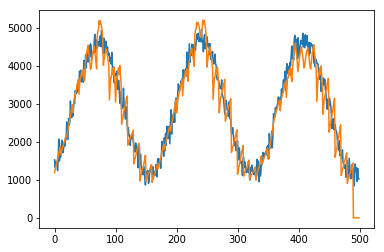

342.30269807059614


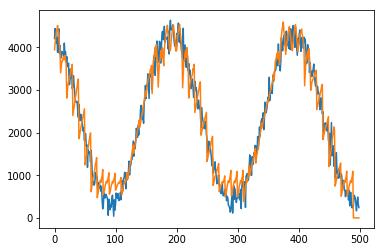

343.40487449929924
Best reconstructions of outlier lightcurves


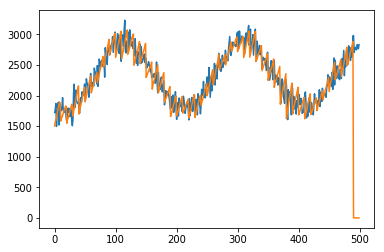

161.68348949642976


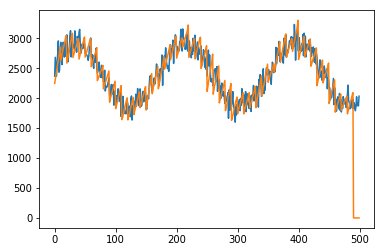

177.45574464455225


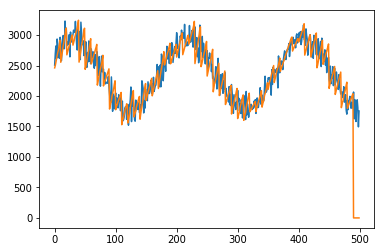

186.61559619789668


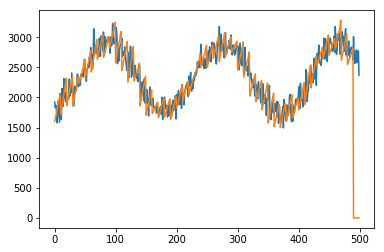

191.62792662355855


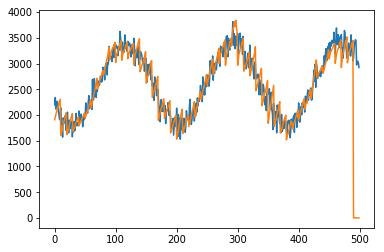

203.078986532623
('no. clusters: ', 150, 'segment length: ', 50)
Worst reconstructions of ordinary lightcurves


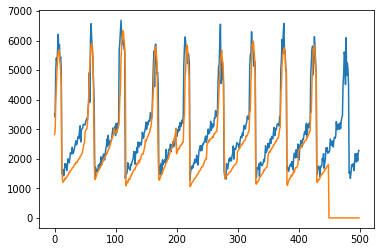

595.2184430162592


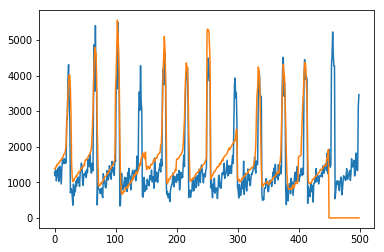

633.8455320399446


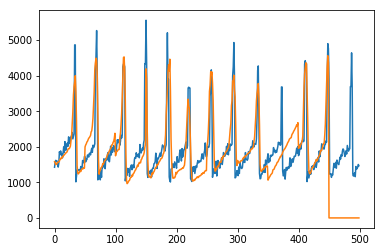

634.003117999961


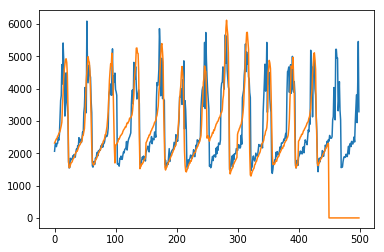

692.4387502804411


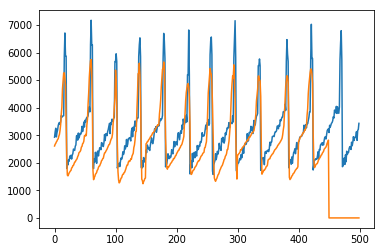

728.0495466049723
Best reconstructions of ordinary lightcurves


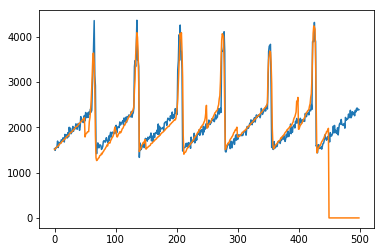

231.66329276605737


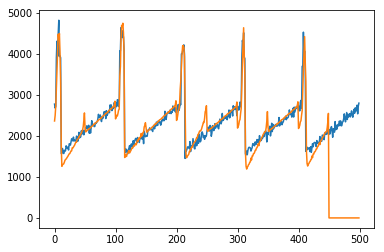

232.8688650087794


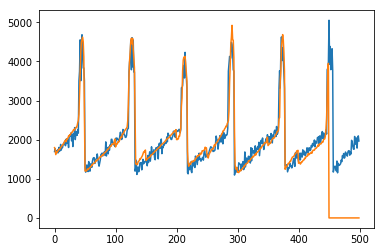

240.93671177836896


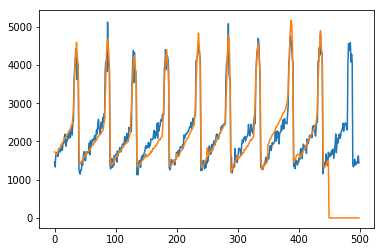

241.4545831523573


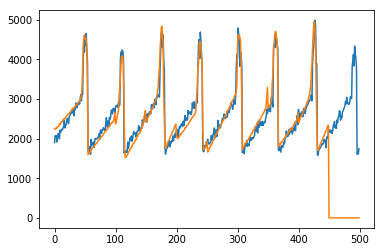

245.41837242902025
Worst reconstructions of outlier lightcurves


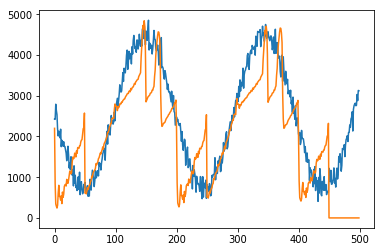

850.3559285497938


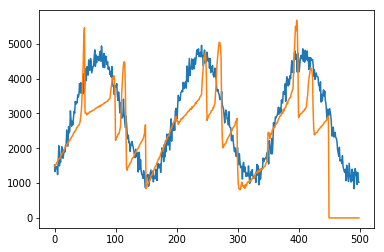

851.636639156547


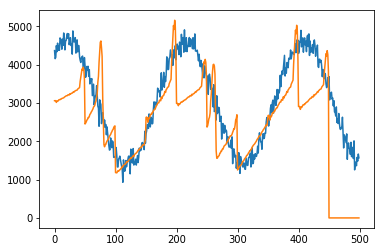

852.6743838037395


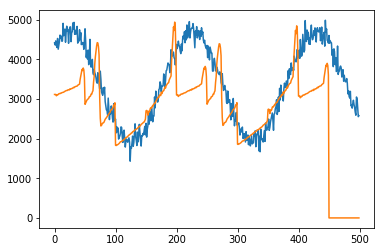

855.0855374271356


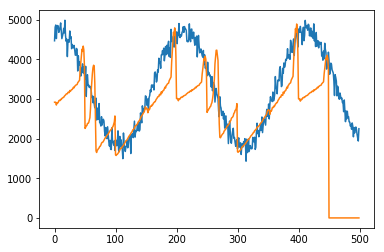

876.9616588173681
Best reconstructions of outlier lightcurves


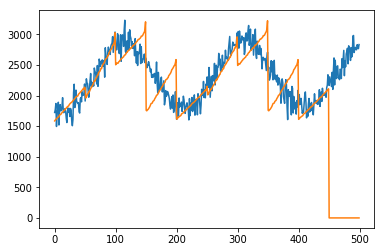

283.01395645719043


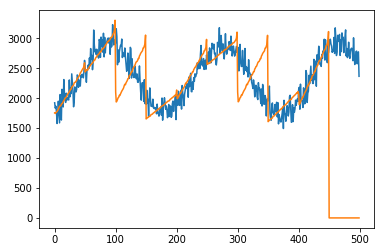

312.7539291170469


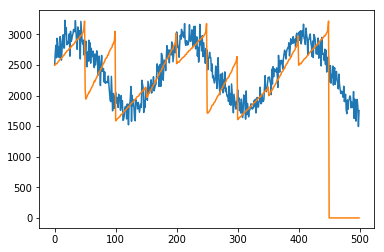

325.1337607632846


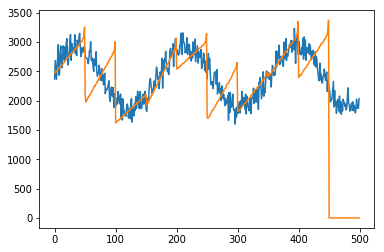

330.15928750400485


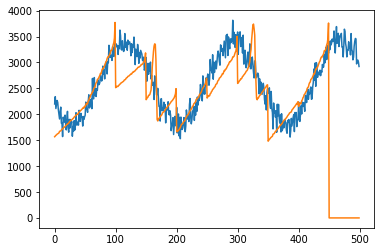

375.9412276082716
('no. clusters: ', 150, 'segment length: ', 100)
Worst reconstructions of ordinary lightcurves


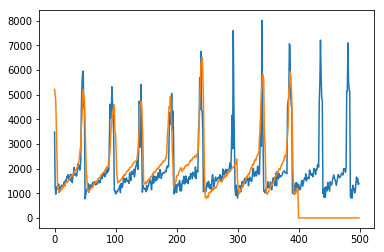

912.628378482852


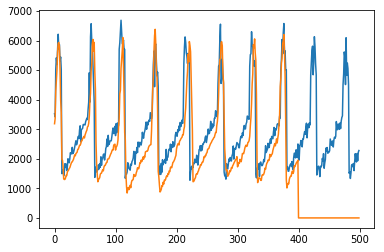

920.6307123198312


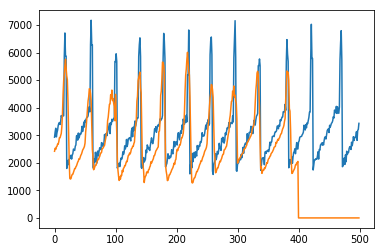

920.9404493438882


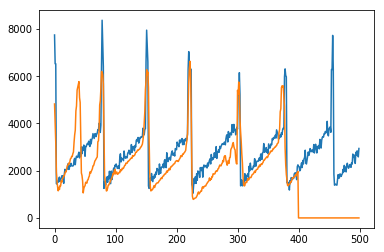

942.0510148253572


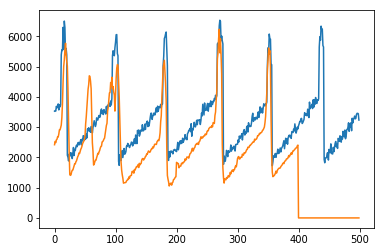

966.0503569160312
Best reconstructions of ordinary lightcurves


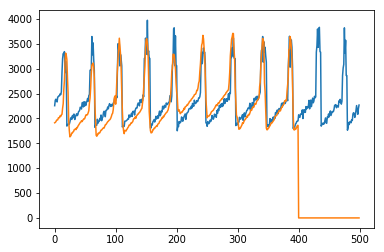

295.2355222153012


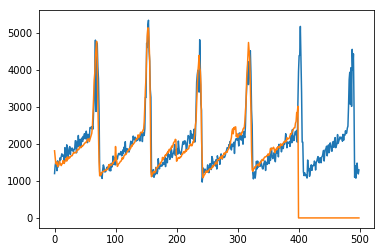

307.43014495271785


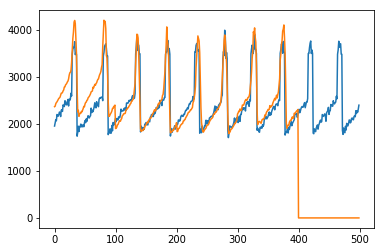

320.35877636436635


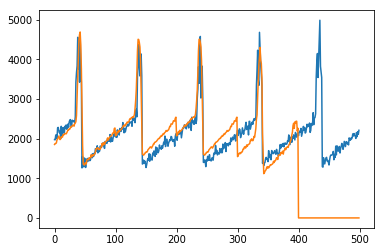

337.8360418887677


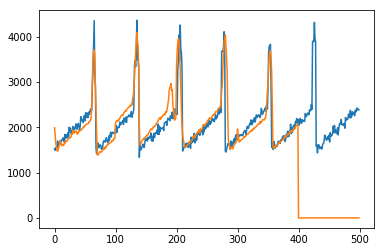

344.9271355792076
Worst reconstructions of outlier lightcurves


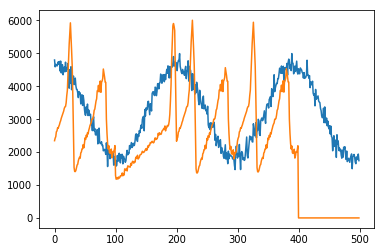

1381.239503921418


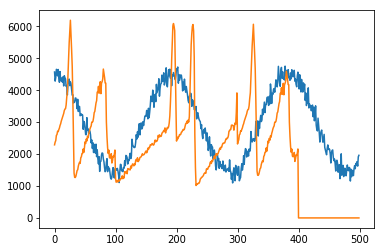

1398.38551658051


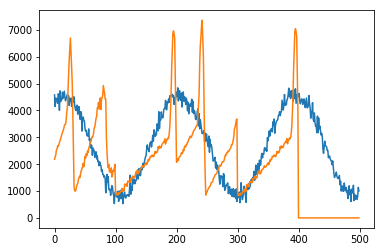

1399.8815898376781


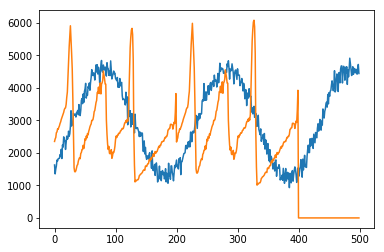

1432.0281279912074


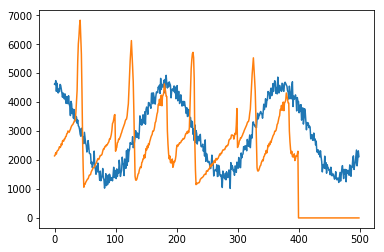

1436.5675404581486
Best reconstructions of outlier lightcurves


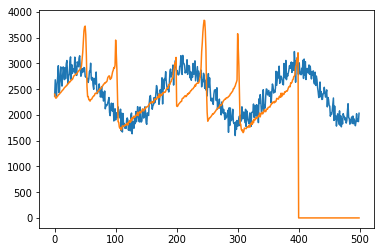

408.5960558157094


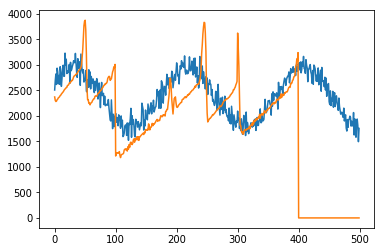

444.84935979019


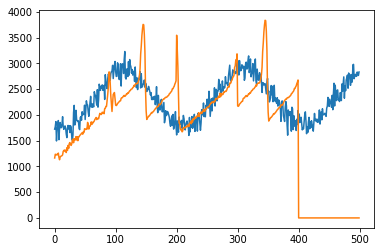

454.33956097669403


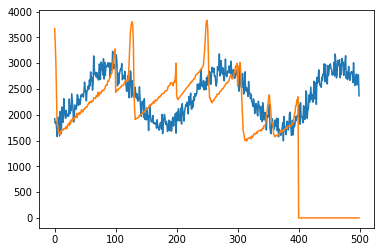

472.38506994001955


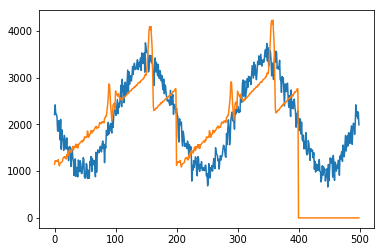

544.7944343701708
('no. clusters: ', 150, 'segment length: ', 150)
Worst reconstructions of ordinary lightcurves


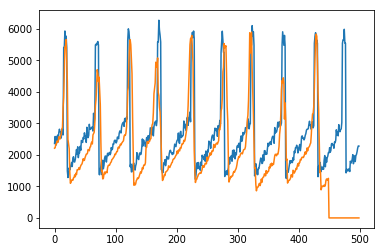

1020.1429005130735


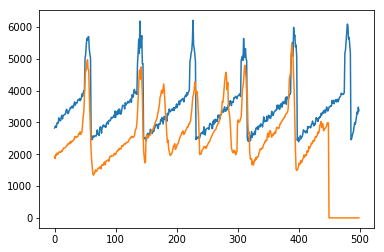

1022.272244531093


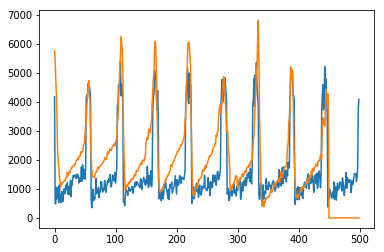

1055.6565953931492


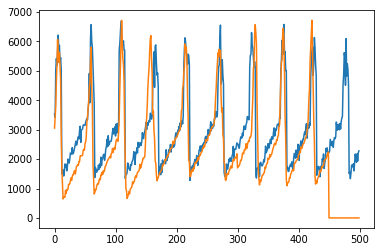

1101.0822766390033


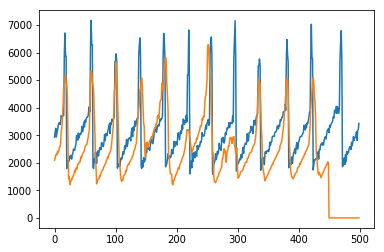

1174.4889941035783
Best reconstructions of ordinary lightcurves


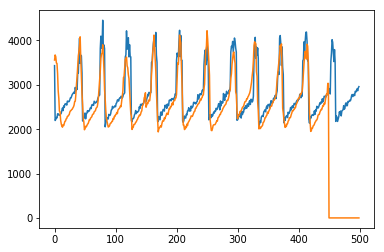

364.07800055707304


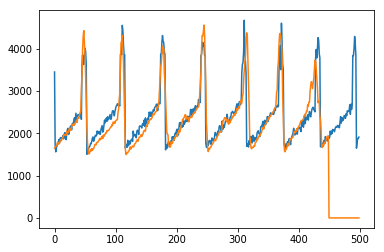

375.41000577536647


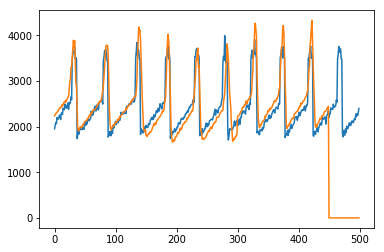

379.36682092939265


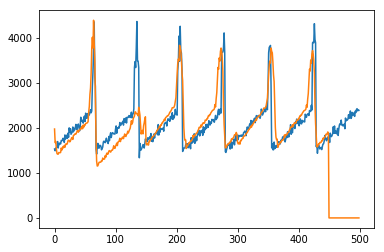

407.7507604998534


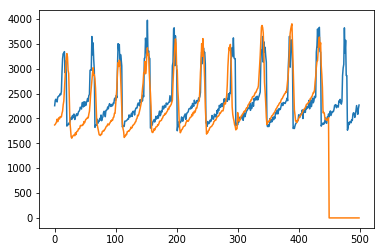

411.0129177700551
Worst reconstructions of outlier lightcurves


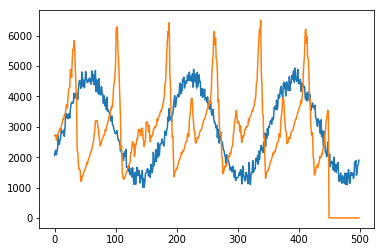

1663.0943031357647


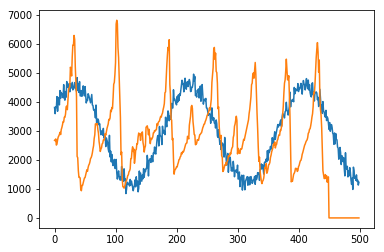

1663.6420917881226


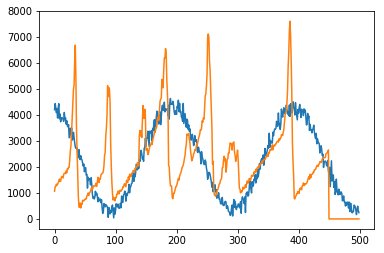

1681.315423385156


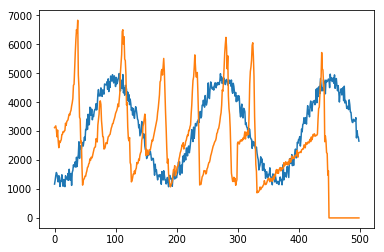

1732.7466363555627


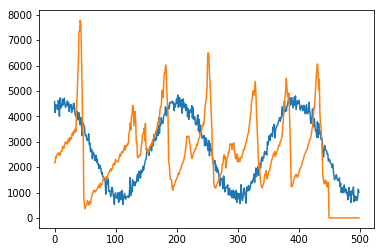

1752.975310965013
Best reconstructions of outlier lightcurves


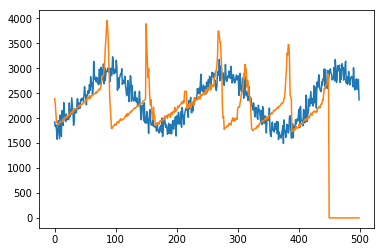

477.0206219636686


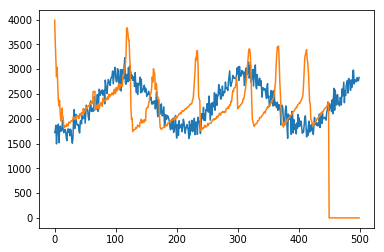

510.8709980506872


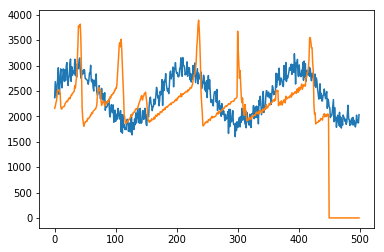

510.98893831911425


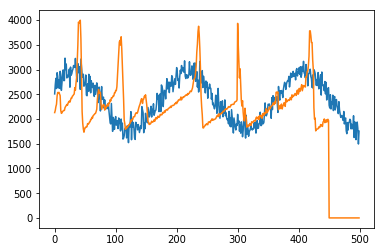

550.3109992184231


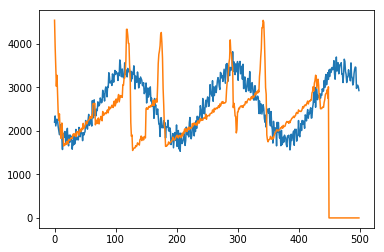

696.6771357439544
('no. clusters: ', 150, 'segment length: ', 200)
Worst reconstructions of ordinary lightcurves


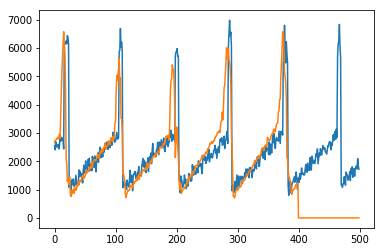

1144.2762999851045


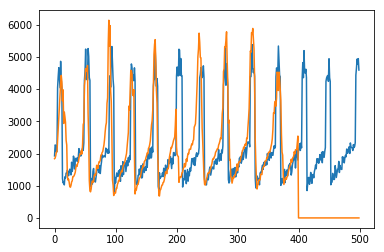

1172.586505387373


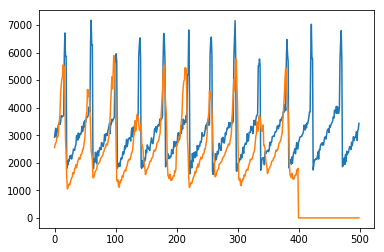

1201.440672719442


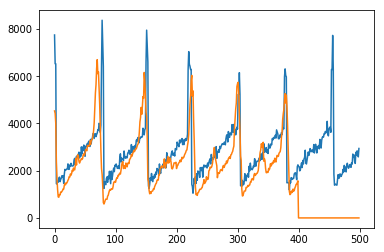

1236.10778705778


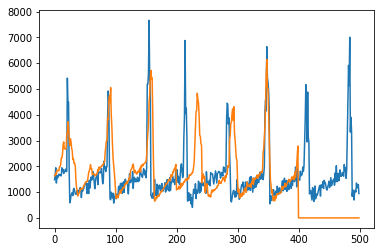

1285.362918996267
Best reconstructions of ordinary lightcurves


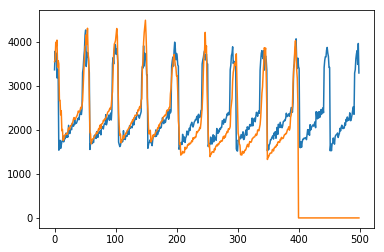

388.65315176363083


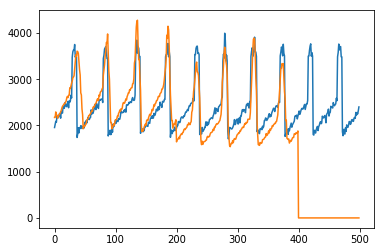

393.93244333028895


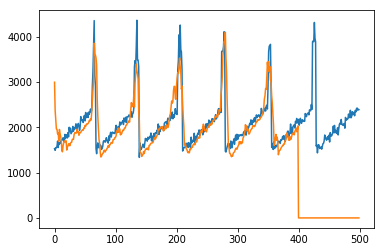

406.440556888593


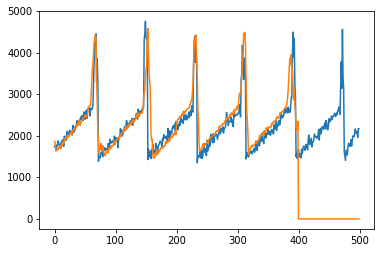

407.6465151449767


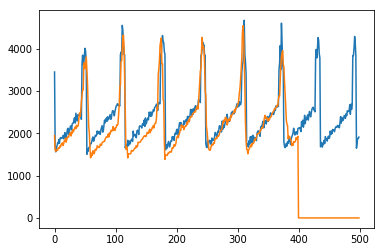

420.7082615420428
Worst reconstructions of outlier lightcurves


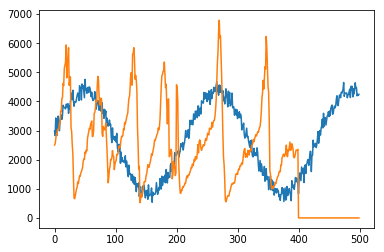

1856.6392647768766


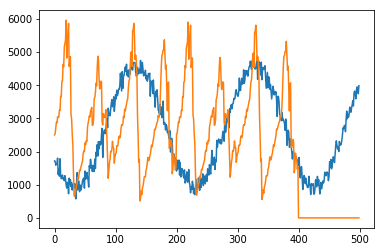

1908.6486511775217


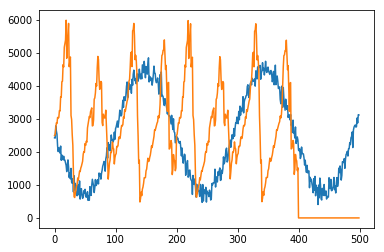

1929.26812442566


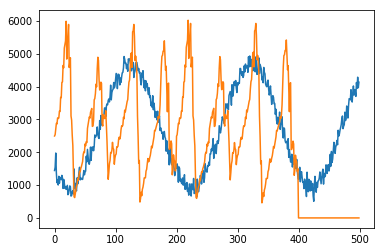

1960.164563212036


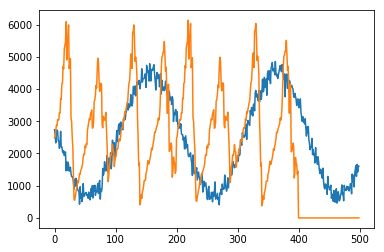

1981.853784539584
Best reconstructions of outlier lightcurves


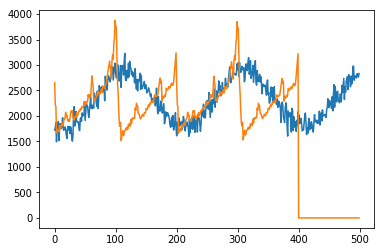

478.62630489999106


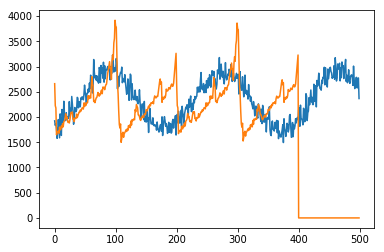

492.0888273326418


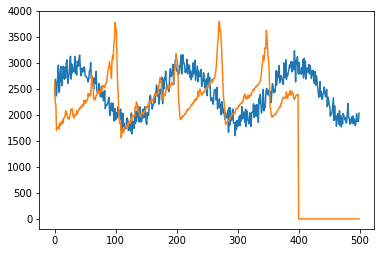

586.7759111456162


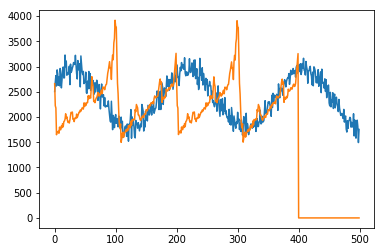

702.9487477455647


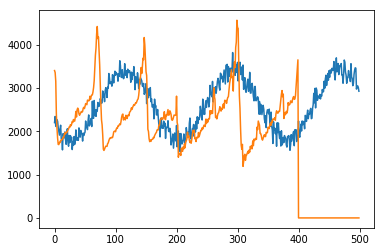

703.7492841623873


In [78]:

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))),test_size=0.25, random_state=0)

plot_worst_training=True
plot_best_training=True
plot_worst_test=True
plot_best_test=True

hyperparameter_set=0
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print(("no. clusters: ", k_cluster, "segment length: ", seg_len))
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(all_train_segments)
        
        ids=output[int((hyperparameter_set+1)*3 -1)]
        def plot_reco(lc):
            valid_segments= sc.segmentation(lc, seg_len, seg_len , time_stamps=False)
            reco = sc.reconstruct(valid_segments, lc, cluster, rel_offset=False, seg_slide=seg_len)
            error=np.sqrt(np.mean((lc[0:-seg_len]-reco[0:-seg_len])**2))
            plt.plot(lc)
            plt.plot(reco)
            plt.show()
            print(error)
            return
        
        if plot_worst_training is True:
            print("Worst reconstructions of ordinary lightcurves")
            for lc_id in ids[0]:
                lc=rho_valid[lc_id]
                plot_reco(lc)
        
        if plot_best_training is True:
            print("Best reconstructions of ordinary lightcurves")
            for lc_id in ids[1]:
                lc=rho_valid[lc_id]
                plot_reco(lc)
        if plot_worst_test is True:
            print("Worst reconstructions of outlier lightcurves")
            for lc_id in ids[2]:
                lc=sine_file[lc_id]
                plot_reco(lc)
        if plot_best_test is True:
            print("Best reconstructions of outlier lightcurves")
            for lc_id in ids[3]:
                lc=sine_file[lc_id]
                plot_reco(lc)
        
        hyperparameter_set+=1

k_clusters:  [150, 200, 250] 
seg_lens:  [10, 20, 30, 40]


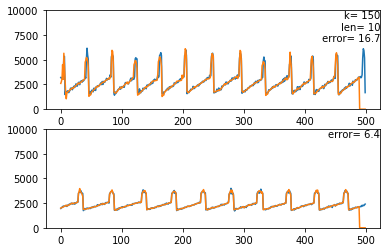

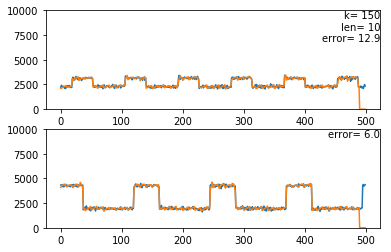

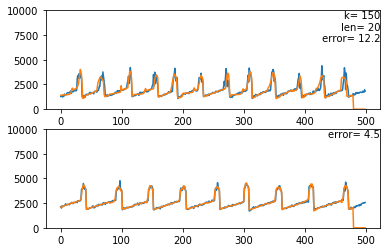

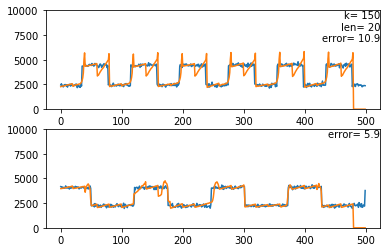

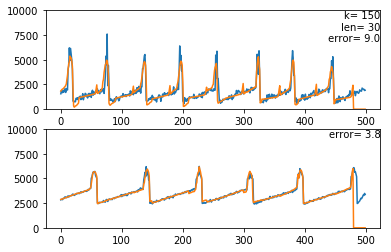

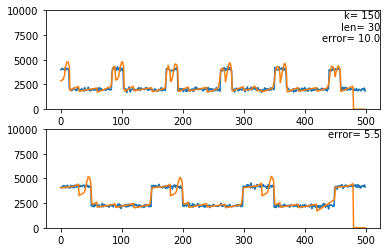

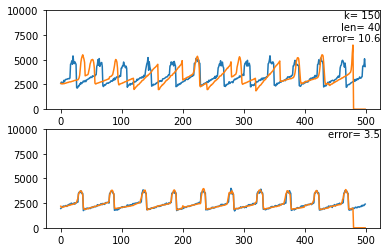

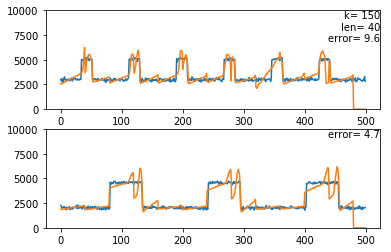

KeyboardInterrupt: 

In [65]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_boxes_thick.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


# inverted_rho=np.copy(rho_valid)
# sine_file=inverted_rho
# for n, in_rho in enumerate(inverted_rho):
#     rho_mean=np.mean(in_rho)
#     inverted_rho[n]-=np.mean(in_rho)
#     inverted_rho[n]*=-1
#     inverted_rho[n]+=abs(np.min(inverted_rho[n])-np.min(rho_valid[n]))




reco_error=[]
#reco_classes=[]
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
print("k_clusters: ", k_clusters, "\nseg_lens: ", seg_lens, flush=True)

for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        ##train the model
        #loop throught the light curves of a given class and segments them
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(zscore(all_train_segments))

        ### reconstruction of the training class
        for n_rho, rho in enumerate(rho_valid):
            valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,0, n_rho, error))
            #print((k_id,len_id,0, n_rho, error), flush=True)
        
        reco_error_ar=np.array(reco_error)
        max_rho=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(max_rho[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, rho_valid[int(max_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(rho_valid[int(max_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\n error= {}".format(k_cluster, seg_len, round(max_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        min_rho=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(min_rho[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, rho_valid[int(min_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(rho_valid[int(min_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        reco_error=[]

        #reconstruction loop through light curves for every class other than rho              
        for n_sine, sine in enumerate(sine_file):
            valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((sine[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,1,n_sine, error))
            #print((k_id,len_id,1,n_sine, error), flush=True)
            
        reco_error_ar=np.array(reco_error)
        max_test=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(max_test[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, sine_file[int(max_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(sine_file[int(max_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\nerror= {}".format(k_cluster, seg_len, round(max_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        
        min_test=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(min_test[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, sine_file[int(min_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(sine_file[int(min_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        
        reco_error=[]
        

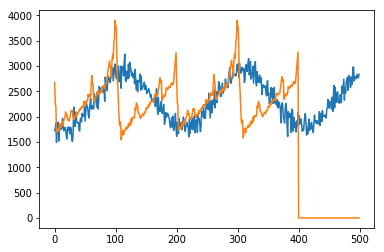

1125.68696544148


In [68]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


#reco_classes=[]
k_cluster=150
seg_len=200

##train the model
#loop throught the light curves of a given class and segments them
all_train_segments=[]
for rho in rho_train:
    train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
#cluster the segments
cluster=KMeans(n_clusters=k_cluster, random_state=0)
cluster.fit(all_train_segments)

        #reconstruction loop through light curves for every class other than rho              
sine=sine_file[122]
valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
reco = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
plt.plot(sine)
plt.plot(reco)
plt.show()
print(np.sqrt(np.mean((reco-sine)**2)))
        
#         reco_error_ar=np.array(reco_error)
#         max_rho=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
#         valid_segments= sc.segmentation(rho_valid[int(max_rho[3])], seg_len, seg_len , time_stamps=False)
#         reco, error = sc.reconstruct(valid_segments, rho_valid[int(max_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
#         f = plt.figure()
#         ax = f.add_subplot(211)
#         plt.plot(rho_valid[int(max_rho[3])])
#         plt.plot(reco)
#         plt.ylim([0,10000])
#         plt.text(1,1,"k= {}\nlen= {}\n error= {}".format(k_cluster, seg_len, round(max_rho[-1],1)),
#                  ha='right', va='top', transform=ax.transAxes)
#         min_rho=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
#         valid_segments= sc.segmentation(rho_valid[int(min_rho[3])], seg_len, seg_len , time_stamps=False)
#         reco, error = sc.reconstruct(valid_segments, rho_valid[int(min_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)


In [75]:
np.random.randint(500)

311

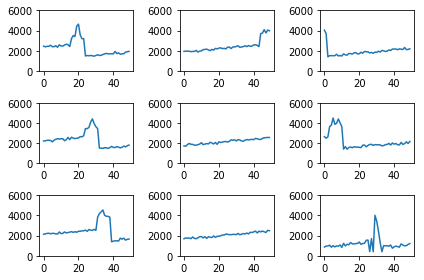

In [39]:
f = plt.figure()

for n, seg in enumerate(cluster.cluster_centers_[0:9]):
    ax = f.add_subplot(3,3,n+1)
    plt.plot(seg)
    plt.ylim(0,6000)
plt.tight_layout()
plt.show()
                              

In [11]:
interval

265.9890335025607

In [16]:
np.savetxt("synthetic_sines_wide.csv" ,sines, delimiter=',')

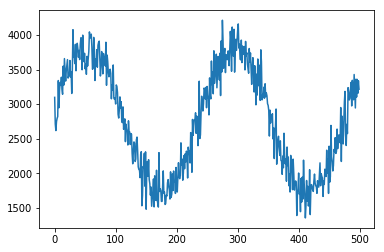

In [14]:
pred_centroid_index=kmeans_model.predict(np.array(segment).reshape(1, -1))[0]

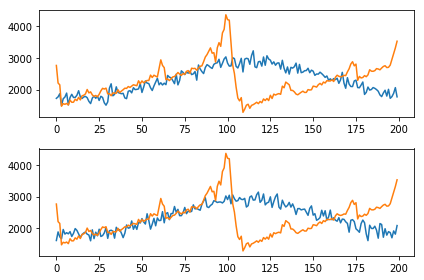

1125.68696544148


In [70]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


#reco_classes=[]
k_cluster=150
seg_len=200


##train the model
#loop throught the light curves of a given class and segments them
all_train_segments=[]
for rho in rho_train:
    train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
#cluster the segments
cluster=KMeans(n_clusters=k_cluster, random_state=0)
cluster.fit(all_train_segments)

        #reconstruction loop through light curves for every class other than rho              
sine=sine_file[122]
valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
# for seg in valid_segments:
#     plt.plot(seg)
#     pred_centroid_index=cluster.predict(np.array(seg).reshape(1, -1))[0]
#     plt.plot(cluster.cluster_centers_[pred_centroid_index])
#     plt.show()
    
    
f = plt.figure()

for n, seg in enumerate(valid_segments[0:9]):
    ax = f.add_subplot(2,1,n+1)
    plt.plot(seg)
    pred_centroid_index=cluster.predict(np.array(seg).reshape(1, -1))[0]
    plt.plot(cluster.cluster_centers_[pred_centroid_index])
plt.tight_layout()
plt.show()
print(np.sqrt(np.mean((reco-sine)**2)))

(array([ 5., 12., 25., 33., 47., 48., 41., 26., 10.,  3.]),
 array([162.8435388 , 170.38372216, 177.92390552, 185.46408889,
        193.00427225, 200.54445561, 208.08463898, 215.62482234,
        223.16500571, 230.70518907, 238.24537243]),
 <a list of 10 Patch objects>)

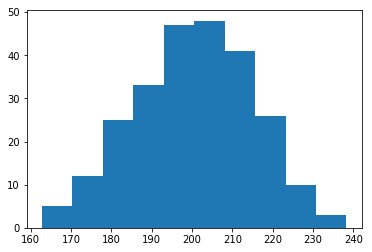

In [14]:
plt.hist(np.random.normal(200, 15,250))

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split


#synthesise sine waves that span the same range as the synthetic rho

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)
list_mins=np.min(rho_train, axis=1)
list_maxs=np.max(rho_train, axis=1)

small_maxs=list_maxs[np.where(list_maxs<5000)[0]]

#"outlier" lightcurves
no_sines=250
lc_len=500
sines=np.zeros((no_sines,lc_len))
for sine in range(no_sines):
    #wavelength of 30-160
    start=np.random.rand()*2*np.pi
    interval=np.random.normal(200, 15)
    xs=np.linspace(start,(lc_len/interval)*2*np.pi+start, num=500)
    ys=np.sin(xs)
    range_ind=np.random.randint(len(small_maxs))
    ys+=1
    ys=(ys/2)*(small_maxs[range_ind]-list_mins[range_ind])
    ys+=np.random.normal(0,200 ,len(ys))
    if np.min(ys)<0:
        ys+=abs(np.min(ys))
    ys*=(small_maxs[range_ind]-list_mins[range_ind])/np.max(ys)
    ys+=list_mins[range_ind]
    sines[sine,:]=ys

In [80]:
cluster.cluster_centers_=cluster.cluster_centers_-np.mean(cluster.cluster_centers_,axis=0)
cluster.cluster_centers_

In [81]:
cluster.cluster_centers_

array([[ -395.0894811 ,  -855.65340578,  -867.8786459 , ...,
         -682.0097338 ,  -634.49907848,  -594.93958734],
       [  469.91062972,  -105.46051611,  -144.71469313, ...,
          883.26856525,  1073.68651913,  1277.19397362],
       [  884.47656245,   663.71264622,   269.83350472, ...,
         -535.39159088,  -494.4179419 ,  -475.81726815],
       ...,
       [-1199.81907559, -1058.66838262, -1027.5680172 , ...,
        -1010.16728138, -1111.71081343, -1092.36760471],
       [   66.00748687,   114.54912908,   135.78880899, ...,
         -367.19087083,  -433.37232962,  -350.65375143],
       [ -531.07535911,  -491.50480685,  -474.68632577, ...,
         -802.78223468,  -624.75802709,  -563.75736643]])